In [1]:
import pickle
import nltk
import string
import pandas as pd
from sklearn.feature_extraction import text
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier,\
StackingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix

In [2]:
with open('speeches.pkl', 'rb') as f:
    speeches = pickle.load(f)

In [3]:
stem = nltk.stem.SnowballStemmer('english')

speeches_cleaned = [[stem.stem(word.lower())
                     for word in nltk.word_tokenize(speech.replace('\'', ''))]\
                     for speech in speeches]

In [117]:
[sorted(list(dict.fromkeys(speech)))[:20] for speech in speeches_cleaned]

[["''",
  '(',
  ')',
  ',',
  '--',
  '.',
  '14th',
  ':',
  ';',
  '``',
  'a',
  'accomplish',
  'accord',
  'acknowledg',
  'acquit',
  'act',
  'actual',
  'actuat',
  'add',
  'addit'],
 ['(',
  ')',
  ',',
  '.',
  ':',
  'about',
  'act',
  'administr',
  'again',
  'all',
  'am',
  'america',
  'an',
  'and',
  'ani',
  'are',
  'arriv',
  'be',
  'been',
  'besid'],
 ['(',
  ')',
  ',',
  '.',
  ';',
  '?',
  'a',
  'abandon',
  'aborigin',
  'abroad',
  'abus',
  'academi',
  'accid',
  'accord',
  'acknowledg',
  'acquir',
  'action',
  'ad',
  'adapt',
  'add'],
 [',',
  '--',
  '.',
  ';',
  '?',
  'a',
  'abandon',
  'about',
  'abov',
  'abroad',
  'absolut',
  'abus',
  'accord',
  'acknowledg',
  'acquiesc',
  'acquisit',
  'action',
  'administr',
  'ador',
  'advanc'],
 [',',
  '--',
  '.',
  ';',
  '?',
  '_in',
  'a',
  'abl',
  'aborigin',
  'abus',
  'accord',
  'accru',
  'acknowledg',
  'acquisit',
  'act',
  'action',
  'add',
  'administ',
  'administr',
  

In [145]:
speeches_cleaned[5][-6:]

['.',
 'from',
 ':',
 'http',
 ':',
 '//www.inaugural.senate.gov/swearing-in/address/address-by-james-madison–1809']

In [146]:
speeches_cleaned[6][-6:]

['.',
 'from',
 ':',
 'http',
 ':',
 '//www.inaugural.senate.gov/swearing-in/address/address-by-james-madison–1813']

In [4]:
speeches_cleaned[5] = speeches_cleaned[5][:-5]
speeches_cleaned[6] = speeches_cleaned[6][:-5]

In [5]:
stops = nltk.corpus.stopwords.words('english')
stops.extend(list(string.punctuation))
stops.extend(list(string.digits))

corpus = []
for speech in speeches_cleaned:
    cleaned = []
    for word in speech:
        if word not in stops and not word.isnumeric():
            cleaned.append(word)
    corpus.append(cleaned)

In [155]:
corpus[0]

['fellow-citizen',
 'senat',
 'hous',
 'repres',
 'among',
 'vicissitud',
 'incid',
 'life',
 'event',
 'could',
 'fill',
 'greater',
 'anxieti',
 'notif',
 'transmit',
 'order',
 'receiv',
 '14th',
 'day',
 'present',
 'month',
 'one',
 'hand',
 'summon',
 'countri',
 'whose',
 'voic',
 'never',
 'hear',
 'vener',
 'love',
 'retreat',
 'chosen',
 'fondest',
 'predilect',
 'flatter',
 'hope',
 'immut',
 'decis',
 'asylum',
 'declin',
 'year',
 '--',
 'retreat',
 'render',
 'everi',
 'day',
 'necessari',
 'well',
 'dear',
 'addit',
 'habit',
 'inclin',
 'frequent',
 'interrupt',
 'health',
 'gradual',
 'wast',
 'commit',
 'time',
 'hand',
 'magnitud',
 'difficulti',
 'trust',
 'voic',
 'countri',
 'call',
 'suffici',
 'awaken',
 'wisest',
 'experienc',
 'citizen',
 'distrust',
 'scrutini',
 'qualif',
 'could',
 'overwhelm',
 'despond',
 'one',
 'inherit',
 'inferior',
 'endow',
 'natur',
 'unpract',
 'duti',
 'civil',
 'administr',
 'ought',
 'peculiar',
 'conscious',
 'defici',
 'confl

In [6]:
with open('speeches_cleaned_tokenized.pkl', 'wb') as f:
    pickle.dump(corpus, f)

In [7]:
len(corpus)

58

In [2]:
with open('speeches_cleaned_tokenized.pkl', 'rb') as f:
    corpus2 = pickle.load(f)

In [9]:
corpus == corpus2

True

In [3]:
with open('target.pkl', 'rb') as f:
    target = pickle.load(f)

In [13]:
target_randd = pd.Series(target)
target_randd = target_randd[(target == 'R') | (target == 'D')]

In [14]:
type(corpus)

list

In [15]:
speeches_randd = []
for j, speech in enumerate(corpus):
    if j in target_randd.index:
        speeches_randd.append(speech)

In [179]:
speeches_randd

[['fellow-citizen',
  'undertak',
  'arduous',
  'duti',
  'appoint',
  'perform',
  'choic',
  'free',
  'peopl',
  'avail',
  'customari',
  'solemn',
  'occas',
  'express',
  'gratitud',
  'confid',
  'inspir',
  'acknowledg',
  'account',
  'situat',
  'enjoin',
  'magnitud',
  'interest',
  'convinc',
  'thank',
  'adequ',
  'honor',
  'confer',
  'admonish',
  'best',
  'return',
  'make',
  'zealous',
  'dedic',
  'humbl',
  'abil',
  'servic',
  'good',
  'instrument',
  'feder',
  'constitut',
  'devolv',
  'state',
  'period',
  'execut',
  'law',
  'unit',
  'state',
  'superintend',
  'foreign',
  'confeder',
  'relat',
  'manag',
  'revenu',
  'command',
  'forc',
  'communic',
  'legislatur',
  'watch',
  'promot',
  'interest',
  'general',
  'principl',
  'action',
  'shall',
  'endeavor',
  'accomplish',
  'circl',
  'duti',
  'proper',
  'briefli',
  'explain',
  'administ',
  'law',
  'congress',
  'shall',
  'keep',
  'steadili',
  'view',
  'limit',
  'well',
  'e

In [16]:
cv = text.CountVectorizer()

In [17]:
cv.fit([' '.join(speech) for speech in speeches_randd])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [18]:
X = cv.transform([' '.join(speech) for speech in speeches_randd])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    target_randd,
                                                    stratify=target_randd,
                                                    random_state=42)

## `MultinomialNB()`

In [20]:
cross_val_score(MultinomialNB(),
               X_train,
               y_train,
               cv=8)

array([0.4 , 0.6 , 0.75, 0.5 , 0.75, 1.  , 0.5 , 1.  ])

In [212]:
mnb = MultinomialNB().fit(X_train, y_train)

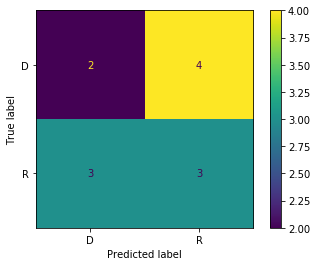

In [214]:
plot_confusion_matrix(mnb, X_test, y_test);

In [240]:
mnb.predict(X_test)

array(['D', 'R', 'R', 'D', 'R', 'D', 'D', 'R', 'R', 'R', 'R', 'D'],
      dtype='<U1')

## `ComplementNB()`

In [219]:
cross_val_score(ComplementNB(),
               X_train,
               y_train)

array([0.42857143, 0.71428571, 0.57142857, 0.85714286, 0.33333333])

In [215]:
cnb = ComplementNB().fit(X_train, y_train)

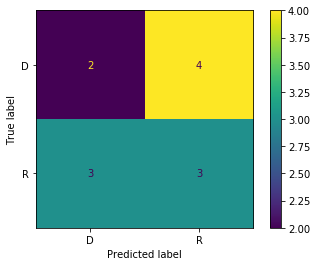

In [218]:
plot_confusion_matrix(cnb, X_test, y_test);

In [241]:
cnb.predict(X_test)

array(['D', 'R', 'R', 'D', 'R', 'D', 'D', 'R', 'R', 'R', 'R', 'D'],
      dtype='<U1')

## `LogisticRegressionCV()`

In [220]:
cross_val_score(LogisticRegressionCV(),
               X_train,
               y_train)

array([0.71428571, 0.85714286, 0.71428571, 0.28571429, 0.66666667])

In [238]:
logreg = LogisticRegressionCV().fit(X_train, y_train)

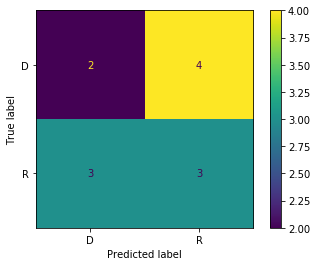

In [239]:
plot_confusion_matrix(logreg,
                     X_test,
                     y_test);

In [242]:
logreg.predict(X_test)

array(['D', 'D', 'D', 'R', 'R', 'R', 'R', 'R', 'R', 'D', 'R', 'D'],
      dtype=object)

## `RandomForestClassifier()`

In [243]:
cross_val_score(RandomForestClassifier(),
               X_train,
               y_train)

array([0.42857143, 0.71428571, 0.71428571, 0.57142857, 0.66666667])

In [254]:
rfc = RandomForestClassifier(random_state=42).fit(X_train, y_train)

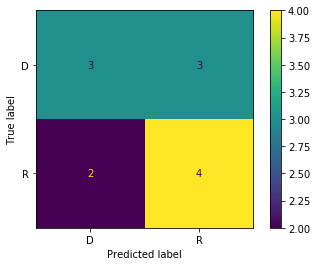

In [255]:
plot_confusion_matrix(rfc,
                     X_test,
                     y_test);

In [256]:
rfc.predict(X_test)

array(['D', 'R', 'R', 'D', 'R', 'R', 'R', 'D', 'R', 'D', 'R', 'D'],
      dtype=object)

## `ExtraTreesClassifier()`

In [257]:
cross_val_score(ExtraTreesClassifier(),
               X_train,
               y_train)

array([0.57142857, 0.42857143, 0.57142857, 0.57142857, 0.66666667])

In [258]:
etc = ExtraTreesClassifier(random_state=42).fit(X_train, y_train)

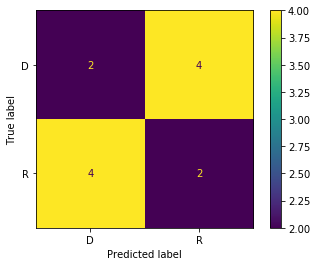

In [260]:
plot_confusion_matrix(etc,
                     X_test,
                     y_test);

## `SVC()`

In [261]:
cross_val_score(SVC(),
               X_train,
               y_train)

array([0.42857143, 0.57142857, 0.71428571, 0.42857143, 0.5       ])

In [263]:
svc = SVC().fit(X_train, y_train)

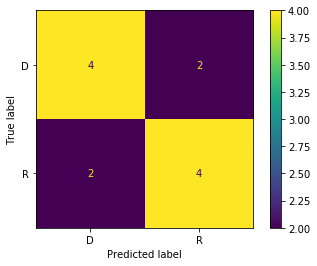

In [265]:
plot_confusion_matrix(svc,
                     X_test,
                     y_test);